In [1]:
#IMPORT LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# LOAD DATASET

data = pd.read_csv("aug_train.csv")

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
data.shape

(19158, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
#CHECK NULL VALUES
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
# FILL NULL VALUES
data.fillna(data.mode().iloc[0], inplace=True) 

In [13]:
data.columns.unique()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

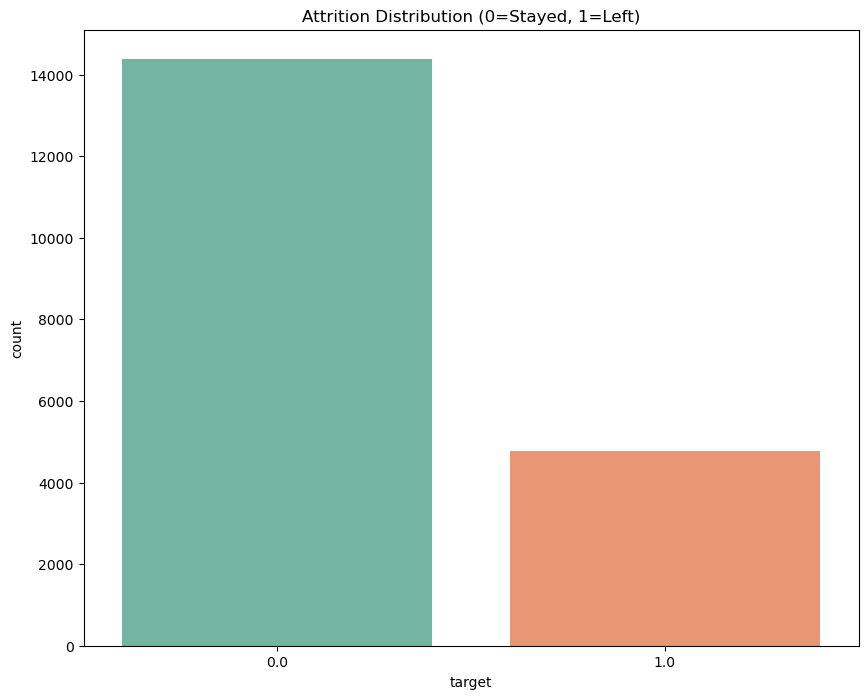

In [34]:
# EDA PERFORM
# ATTRITION DISTRIBUTION
plt.figure(figsize=(10,8))
sns.countplot(x="target", data=data, palette="Set2")
plt.title("Attrition Distribution (0=Stayed, 1=Left)")
plt.show()

C:\Users\kr304\AppData\Local\Temp\ipykernel_21100\3100753021.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="gender", y="target",ci=False, data=data, palette="viridis")


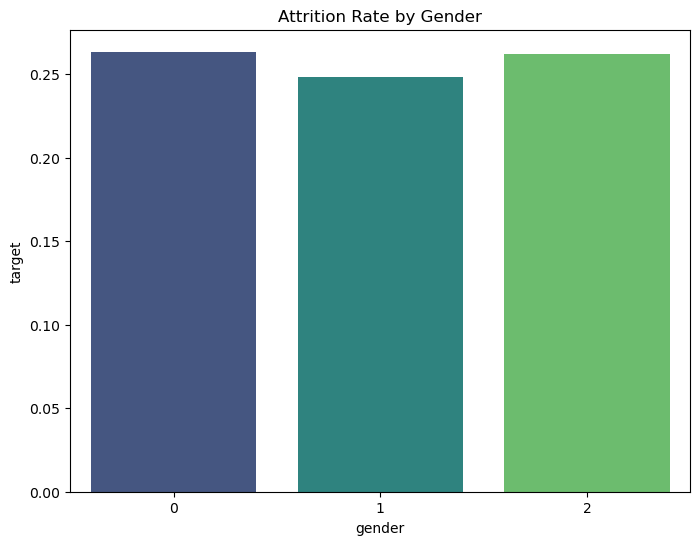

In [30]:
# ATTRITION RATE BY GENDER

plt.figure(figsize=(8,6))
sns.barplot(x="gender", y="target",ci=False, data=data, palette="viridis")
plt.title("Attrition Rate by Gender")
plt.show()

In [23]:
# ENCODING TO CONVERT CATEGORICAL DATA INTO NUMERIC 

le = LabelEncoder()
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])

In [25]:
X = data.drop("target", axis=1)   # "target" column = whether employee left
y = data["target"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# MODEL TRAIN

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

results_data = pd.DataFrame(results)
print("\nModel Comparison:\n", results_data)


Logistic Regression Accuracy: 0.7662
[[2686  194]
 [ 702  250]]
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2880
         1.0       0.56      0.26      0.36       952

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832


Decision Tree Accuracy: 0.7043
[[2286  594]
 [ 539  413]]
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2880
         1.0       0.41      0.43      0.42       952

    accuracy                           0.70      3832
   macro avg       0.61      0.61      0.61      3832
weighted avg       0.71      0.70      0.71      3832


Random Forest Accuracy: 0.7657
[[2572  308]
 [ 590  362]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      2880
         1.0       0.54      0.38      0.45       952


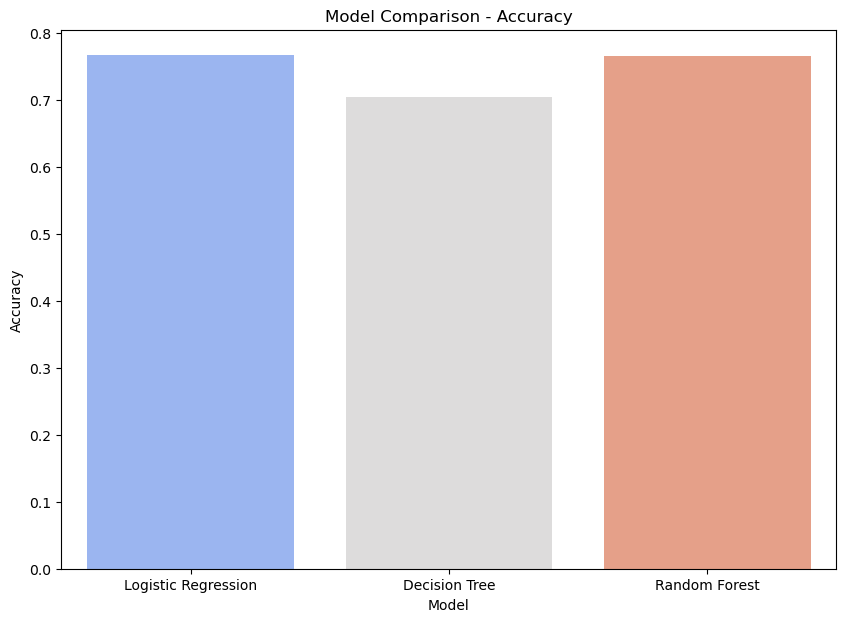

In [29]:
# MODEL COMPARISON BASE ON ACCURACY

plt.figure(figsize=(10,7))
sns.barplot(x="Model", y="Accuracy", data=results_data, palette="coolwarm")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.show()

In [37]:
# SPLIT DATA IN x AND y VARIABLE FOR LOGISTIC REGRESSION MODEL TRANING 

x=data.iloc[:,1:13]
y=data.iloc[:,-1]

In [38]:
# IMPORT LIBRARIRES 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20) 

In [39]:
# DEFINE MODEL
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [40]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [41]:
# FIT THE MODEL
model.fit(xtrain,ytrain)

C:\Users\kr304\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.predict(xtest)

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
prediction=model.predict(xtest)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,prediction)

0.7638308977035491

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,prediction)

array([[2821,   97],
       [ 808,  106]], dtype=int64)

In [ ]:
# CONCLUSION-
# AFTER THE RESULT WE CAN SEE THAT THE HIGEST ACCURACY (76.3%) PROVIED BY LOGISTIC REGRESSION
# FOR PREDICTING EMPLOYEE ATTRITION WHERE AS OTHER MODEL(DECISION TREE AND RANDOM FOREST) ARE NOT GOOD AS LOGISTIC REGRESSION.

In [ ]:
# FEATURES-
# PREDICTS PROBABILITY OF EMPLOYEE LEAVING (ATTRITION=1)
# WORKS WELL WITH BINARY CLASSIFICTION PROBLEMS LIKE ATTRITION(0=STAYED,1=LEFT)
# SIMPLE AND INTERPRETABLE

In [ ]:
# ADVANTAGES-
# GOOD BASELINE PERFORMANCE-gives a reference accuracy(76.3%)
# HIGH INTERPRETABILITY
# EFFICIENT FOR LARGE DATASET

In [ ]:
# DISADVANTAGES-
# LOWER ACCURACY THAN ADVANCE MODELS
# NOT SUITABLE FOR COMPLEX RELATIONSHIP AND SENSITIVE TO OUTLIERS
# NOT SUITABLE FOR NON-LINEAR PROBLEMS UNLESS FEATURES ARE TRANSFORM

In [ ]:
# WORKFLOW-
# DEFINING THE PROBLEM 
# DATA COLLECTION AND PREPROCESSING 
# SPLIT DATASET 
# MODEL BUILDING 
# MODEL TRAINING 
# PREDICTION 
# MODEL EVELUATION 
# DEPLOYMENT